1. Read json file
2. Set up the sampler through batchrunner
3. generate the input file
4. save it.

In [208]:
# Import relevant libraries
import os
from ModularCirc import BatchRunner
import numpy as np
import pandas as pd
from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters, TEMPLATE_TIME_SETUP_DICT
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample as sobol_sample
from SALib.analyze.sobol import analyze as sobol_analyze
import matplotlib.pyplot as plt
from autoemulate.compare import AutoEmulate
from SALib.analyze.sobol import analyze
import numpy as np
import seaborn as sns

In [2]:
os.getcwd()

'/Users/syonis/project/comparative-gsa/sandbox'

In [3]:
# Define variables
param_path = "./parameters_01.json"

n_samples = 10000 # Powers of 2

simulation_out_path = f'outputs/simulations/output_{n_samples}_samples'

os.makedirs(os.path.join(simulation_out_path, 
                         f'raw_simulations_{n_samples}_samples'), 
                         exist_ok=True)

In [4]:
# Set up the batch runner
br = BatchRunner('Sobol', 0) # why are we using 'Sobol' here? 
br.setup_sampler(param_path)
br.sample(n_samples)

/Users/syonis/project/comparative-gsa/venv/lib/python3.11/site-packages/ModularCirc/_BatchRunner.py:59: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples  = self._sampler.random(nsamples)


In [5]:
br.samples

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,ven.v_ref,la.v,la.delay,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max
0,324.140512,0.429410,970.557289,2.593650,5.759509,141.391649,5.535208,3.645771,0.302181,0.614511,...,2800,93,150,225,25,150,0,420,25,280
1,213.211374,0.168363,1134.582900,3.092750,11.457833,81.051107,6.337772,5.927350,0.476733,0.449234,...,2800,93,150,225,25,150,0,420,25,280
2,128.027561,0.373035,664.791603,1.807716,9.775524,110.934879,3.831676,4.690519,0.657067,0.244713,...,2800,93,150,225,25,150,0,420,25,280
3,287.120769,0.262023,1448.888220,3.761496,8.444797,167.239972,7.529157,2.905174,0.338195,0.522401,...,2800,93,150,225,25,150,0,420,25,280
4,261.317508,0.322630,1342.111306,4.190009,7.184780,154.969280,3.238999,4.237066,0.583734,0.372392,...,2800,93,150,225,25,150,0,420,25,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,245.158275,0.152974,632.462180,3.567414,8.075326,140.345598,3.145183,2.569019,0.498767,0.546991,...,2800,93,150,225,25,150,0,420,25,280
9996,271.400874,0.391782,1086.546437,3.247391,7.658897,185.997291,7.810291,4.572693,0.311665,0.361704,...,2800,93,150,225,25,150,0,420,25,280
9997,145.948268,0.205758,1308.658036,2.433350,11.245667,125.534706,4.113221,2.245803,0.467249,0.646451,...,2800,93,150,225,25,150,0,420,25,280
9998,225.298449,0.335656,828.953812,3.961548,12.797720,99.817020,6.056587,3.507408,0.613262,0.498152,...,2800,93,150,225,25,150,0,420,25,280


In [6]:
map_ = {
    'lv.t_tr' : ['lv.t_tr',],
    'la.t_tr' : ['la.t_tr',],
    'la.delay' : ['la.delay',],
    'lv.tau' : ['lv.tau',],
    'la.tau' : ['la.tau',],
    'lv.t_max' : ['lv.t_max',],
    'la.t_max' : ['la.t_max',],
}
br.map_sample_timings(
    ref_time=1000., # double check if 1000 or 1
    map=map_
    )

In [7]:
br.map_vessel_volume()

In [8]:
br.samples

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max,ao.v,art.v,ven.v
0,324.140512,0.429410,970.557289,2.593650,5.759509,141.391649,5.535208,3.645771,0.302181,0.614511,...,103.265426,11.473936,68.843618,0,192.762129,11.473936,128.508086,11.183394,67.548099,3682.353190
1,213.211374,0.168363,1134.582900,3.092750,11.457833,81.051107,6.337772,5.927350,0.476733,0.449234,...,264.970053,29.441117,176.646702,0,494.610765,29.441117,329.740510,12.893425,236.845967,6206.977557
2,128.027561,0.373035,664.791603,1.807716,9.775524,110.934879,3.831676,4.690519,0.657067,0.244713,...,173.562758,19.284751,115.708506,0,323.983815,19.284751,215.989210,14.695447,71.213695,4370.200691
3,287.120769,0.262023,1448.888220,3.761496,8.444797,167.239972,7.529157,2.905174,0.338195,0.522401,...,132.781531,14.753503,88.521021,0,247.858858,14.753503,165.239239,8.718682,125.161948,5564.827928
4,261.317508,0.322630,1342.111306,4.190009,7.184780,154.969280,3.238999,4.237066,0.583734,0.372392,...,146.342358,16.260262,97.561572,0,273.172401,16.260262,182.114934,10.757573,139.708922,5167.193956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,245.158275,0.152974,632.462180,3.567414,8.075326,140.345598,3.145183,2.569019,0.498767,0.546991,...,170.899791,18.988866,113.933194,0,319.012944,18.988866,212.675296,5.388722,125.667518,4943.884959
9996,271.400874,0.391782,1086.546437,3.247391,7.658897,185.997291,7.810291,4.572693,0.311665,0.361704,...,209.576909,23.286323,139.717939,0,391.210230,23.286323,260.806820,11.271178,93.424295,5350.962290
9997,145.948268,0.205758,1308.658036,2.433350,11.245667,125.534706,4.113221,2.245803,0.467249,0.646451,...,149.018457,16.557606,99.345638,0,278.167786,16.557606,185.445190,7.065405,83.557444,4310.665572
9998,225.298449,0.335656,828.953812,3.961548,12.797720,99.817020,6.056587,3.507408,0.613262,0.498152,...,87.076108,9.675123,58.050739,0,162.542068,9.675123,108.361379,19.791412,233.585927,5885.540859


In [9]:
# Save the samples to a CSV file

br.samples.to_csv(os.path.join(simulation_out_path,
                               f'input_samples_{n_samples}.csv'),
                                 index=False)

In [10]:
br.setup_model(model=NaghaviModel, po=NaghaviModelParameters,
                   time_setup=TEMPLATE_TIME_SETUP_DICT)

In [11]:
simulations = br.run_batch(
            n_jobs=10,
            output_path=os.path.join(simulation_out_path, f'raw_simulations_{n_samples}_samples') 
        )

100%|██████████| 10000/10000 [12:53<00:00, 12.92it/s]


In [12]:
## Setting up the headers of the columns for my simulation summary similar to fay
##headers = [
   # 'v_ao', 'v_art', 'v_ven', 'v_la', 'v_lv', 'p_lv', 'q_av', 'p_ao', 'p_art',
   # 'q_ao', 'p_ven', 'q_art', 'p_la', 'q_ven', 'q_mv', 'T'
#]

summary_rows = []

for i_sim in range(len(simulations)): ## stuck with the length of simulations like fay
    sim_df = simulations[i_sim]
    
    # Skip if not a DataFrame this was needed because sometimes simulations can return None or other types. or false.
    if not isinstance(sim_df, pd.DataFrame):
        print(f"Simulation {i_sim} is not a DataFrame, skipping.")
        continue

    row = {} ##the 'dictiionary' to hold the summary for each simulation
    for h in sim_df.columns: # We had sim_df the whole time which means h can be used without the headers list!
        row[f"{h}_mean"] = sim_df[h].mean()
        row[f"{h}_max"] = sim_df[h].max() ## using the headers defined above to make the new csv file headers eg v_ao_mean, v_ao_max, etc.
    summary_rows.append(row) # this is a list that is being used to collect summary data for our simulations.
    print(f"Simulation {i_sim} done.") # simple way to track progress 

summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(os.path.join(simulation_out_path, "simulations_summary.csv"), index=False)  ## the location, nice and organised!
print("Saved as simulation_summary.csv") # not really needed but nice to show the file has been saved! :D

Simulation 0 done.
Simulation 1 done.
Simulation 2 done.
Simulation 3 done.
Simulation 4 done.
Simulation 5 done.
Simulation 6 done.
Simulation 7 done.
Simulation 8 done.
Simulation 9 done.
Simulation 10 done.
Simulation 11 done.
Simulation 12 done.
Simulation 13 done.
Simulation 14 done.
Simulation 15 done.
Simulation 16 done.
Simulation 17 done.
Simulation 18 done.
Simulation 19 done.
Simulation 20 done.
Simulation 21 done.
Simulation 22 done.
Simulation 23 done.
Simulation 24 done.
Simulation 25 done.
Simulation 26 done.
Simulation 27 done.
Simulation 28 done.
Simulation 29 done.
Simulation 30 done.
Simulation 31 is not a DataFrame, skipping.
Simulation 32 done.
Simulation 33 done.
Simulation 34 done.
Simulation 35 done.
Simulation 36 done.
Simulation 37 done.
Simulation 38 done.
Simulation 39 done.
Simulation 40 done.
Simulation 41 done.
Simulation 42 done.
Simulation 43 done.
Simulation 44 done.
Simulation 45 done.
Simulation 46 done.
Simulation 47 done.
Simulation 48 done.
Simula

In [ ]:
# reading everything in to a clear input and output
input_file = "outputs/simulations/output_10000_samples/input_samples_10000.csv"
summary_file = "outputs/simulations/output_10000_samples/simulations_summary.csv"

X = pd.read_csv(input_file)
Y = pd.read_csv(summary_file)

In [199]:
def ensure_valid_sobol_blocks(X, Y):
    D = X.shape[1]                    # Number of parameters
    block_size = D + 2                # Sobol block size
    n_rows = min(len(X), len(Y))      # Use minimum
    n_blocks = n_rows // block_size   # Number of complete blocks
    n_valid_rows = n_blocks * block_size
    # Trim to valid number of rows
    X_valid = X.iloc[:n_valid_rows].reset_index(drop=True)
    Y_valid = Y.iloc[:n_valid_rows].reset_index(drop=True)
    print(f"Trimmed to {n_blocks} valid Sobol blocks ({n_valid_rows} samples).")
    return X_valid, Y_valid

# Usage
X, Y = ensure_valid_sobol_blocks(X, Y)

Trimmed to 269 valid Sobol blocks (9953 samples).


In [200]:
parameter_names = list(X.columns)
parameter_bounds = []
for name in parameter_names:
    min_val = X[name].min()
    max_val = X[name].max()
    parameter_bounds.append([min_val, max_val])

problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}
print(problem)


{'num_vars': 35, 'names': ['ao.r', 'ao.c', 'art.r', 'art.c', 'ven.r', 'ven.c', 'av.r', 'mv.r', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'lv.E_pas', 'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'T', 'ao.l', 'ao.v_ref', 'art.l', 'art.v_ref', 'ven.l', 'ven.v_ref', 'la.v', 'la.delay', 'la.t_tr', 'la.tau', 'la.t_max', 'lv.delay', 'lv.t_tr', 'lv.tau', 'lv.t_max', 'ao.v', 'art.v', 'ven.v'], 'bounds': [[120.01259721815586, 359.9867568165064], [0.1500264527276158, 0.4499917041510343], [562.5735721550882, 1687.3928834684193], [1.500099744647741, 4.499947934411466], [4.500980489887297, 13.499109766446054], [66.65771823739634, 199.9493532029912], [3.0001923479139805, 8.999791072681546], [2.050137367751449, 6.149927610345184], [0.2200043145939707, 0.6599811893701554], [0.2250389046035707, 0.6749931042082609], [5.000850260257721, 14.999169260263445], [0.016651209124457, 0.0749977642337791], [0.5000900933519006, 1.4999027270823715], [1.5001554619520905, 4.4998628022149205], [5.000569121912122, 14.99895

In [221]:
output_feature = "v_la_mean"  # Change to any column in Y

Y_feature = Y[output_feature].values #.values converts coverts to numpy array.

# Run Sobol sensitivity analysis (first-order only)
sobol_indices = sobol_analyze(problem, Y_feature, calc_second_order=False)

# sorting using argsort function S1 indices returns in ascending order, so we reverse it with [::-1], so biggest first
names = np.array(problem['names'])
S1 = np.array(sobol_indices['S1'])
S1_conf = np.array(sobol_indices['S1_conf']) ##uncertainties of the S1 indices
sorted_idx = np.argsort(S1)[::-1]
S1_sorted = S1[sorted_idx]
S1_conf_sorted = S1_conf[sorted_idx]
names_sorted = names[sorted_idx]

# Show the sorted sensitivities (may be better to make a table)
for n, s, c in zip(names_sorted, S1_sorted, S1_conf_sorted):
    print(f"{n}: S1={s:.3f} ± {c:.3f}")

ao.c: S1=0.396 ± 0.190
ao.v_ref: S1=0.387 ± 0.183
la.v: S1=0.381 ± 0.177
art.v_ref: S1=0.350 ± 0.185
art.c: S1=0.336 ± 0.173
lv.delay: S1=0.296 ± 0.156
av.r: S1=0.293 ± 0.189
la.E_pas: S1=0.283 ± 0.153
lv.tau: S1=0.277 ± 0.192
lv.E_act: S1=0.276 ± 0.177
la.t_max: S1=0.266 ± 0.162
ao.r: S1=0.248 ± 0.183
ven.c: S1=0.242 ± 0.186
ao.v: S1=0.233 ± 0.177
lv.k_pas: S1=0.211 ± 0.193
la.v_ref: S1=0.202 ± 0.182
ven.v_ref: S1=0.201 ± 0.165
la.tau: S1=0.194 ± 0.154
la.E_act: S1=0.185 ± 0.152
T: S1=0.165 ± 0.158
lv.E_pas: S1=0.161 ± 0.164
ven.l: S1=0.139 ± 0.163
ao.l: S1=0.117 ± 0.189
la.t_tr: S1=0.114 ± 0.196
lv.t_max: S1=0.112 ± 0.141
la.k_pas: S1=0.108 ± 0.128
lv.v_ref: S1=0.084 ± 0.145
mv.r: S1=0.032 ± 0.151
ven.v: S1=0.012 ± 0.169
art.r: S1=0.009 ± 0.147
la.delay: S1=-0.005 ± 0.153
art.v: S1=-0.005 ± 0.153
ven.r: S1=-0.008 ± 0.165
lv.t_tr: S1=-0.011 ± 0.148
art.l: S1=-0.116 ± 0.139


/Users/syonis/project/comparative-gsa/venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


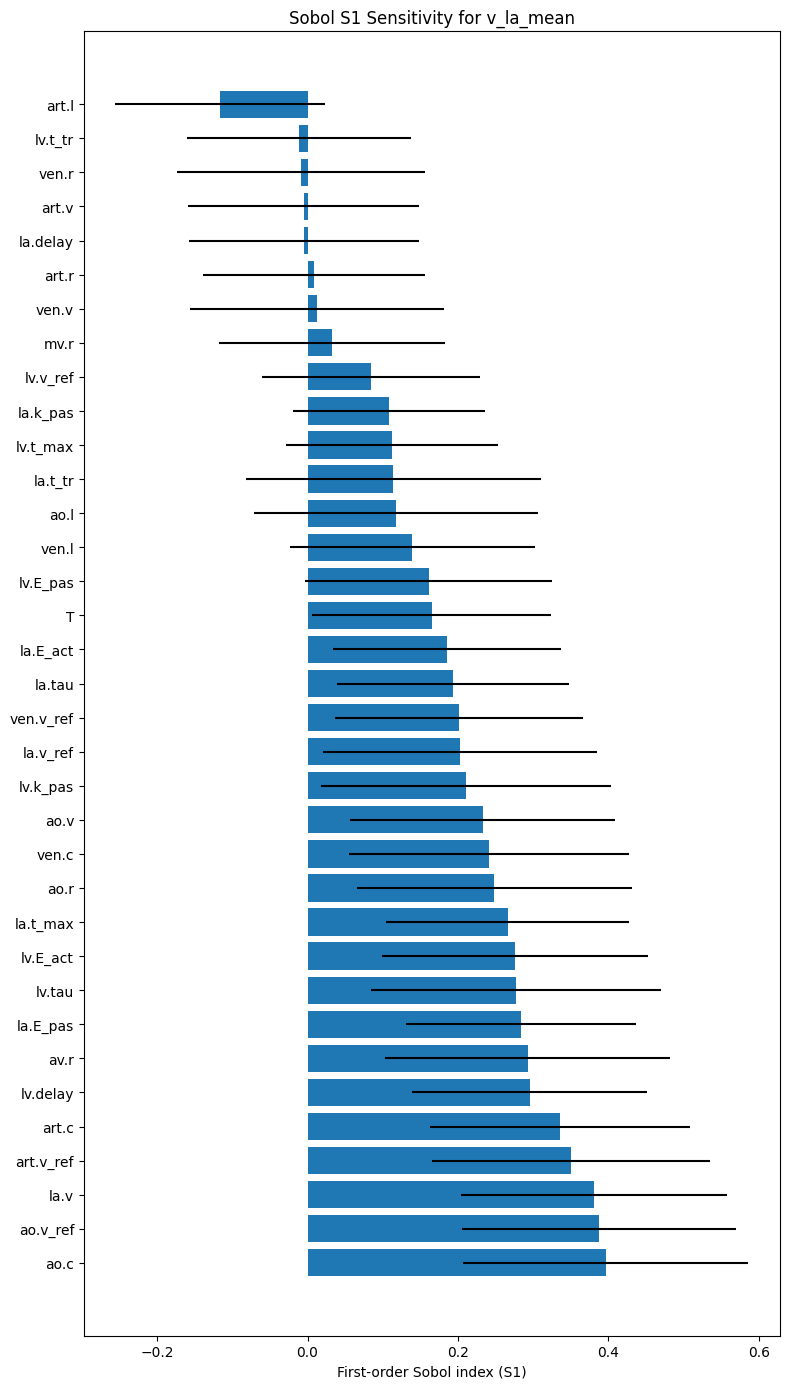

In [222]:
import matplotlib.pyplot as plt

# Plotting the sortd s1 indicies as a horizontal bar chart for now will explore heatmaps and piecharts later
y = np.arange(len(names_sorted))
plt.figure(figsize=(8, max(4, 0.4 * len(names_sorted))))
plt.barh(y, S1_sorted, xerr=S1_conf_sorted, color='#1f77b4')
plt.yticks(y, names_sorted)
plt.xlabel("First-order Sobol index (S1)")
plt.title(f"Sobol S1 Sensitivity for {output_feature}")
plt.tight_layout()
plt.show()

In [ ]:
# Check for bool values in the list
bool_indices = [index for index, value in enumerate(simulations) if isinstance(value, bool)]

if bool_indices:
    print(f"Boolean values found at indices: {bool_indices}")
    print(f"Number of Booleans = {len(bool_indices)}")
else:
    print("No boolean values found in the list.")

helper_functions.save_csv(pd.DataFrame(bool_indices), os.path.join(output_parameters, f'bool_indices_{n_samples}.csv'))

In [ ]:
def select_feasible_traces(simulated_traces, output_path):
    # Create column headers
    headers = list(range(100)) + ['CO', 'dt', 'EF', 'dPAP', 'sPAP', 'mPAP']

    # List to collect all pressure traces
    pressure_traces_list_pat = []
    pressure_traces_list_rv = []

    for ind in range(len(simulated_traces)):
        if not isinstance(simulated_traces[ind], bool):  # <-- Check if the trace is not a boolean i think
        
            # Process successful simulation... if it is not a boolean